In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
target_names = ['normal', 'Dos', 'Probe', 'R2L', 'U2R']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13498
           1       0.99      1.00      0.99     13396
           2       1.00      1.00      1.00     13510
           3       0.99      1.00      1.00     13520
           4       0.99      0.99      0.99     13418

    accuracy                           0.99     67342
   macro avg       0.99      0.99      0.99     67342
weighted avg       0.99      0.99      0.99     67342

Confusion Matrix:
 [[13453    39     0     0     6]
 [   26 13345     1     3    21]
 [    0     0 13458    25    27]
 [    0     0     2 13504    14]
 [   18    51    46    66 13237]]


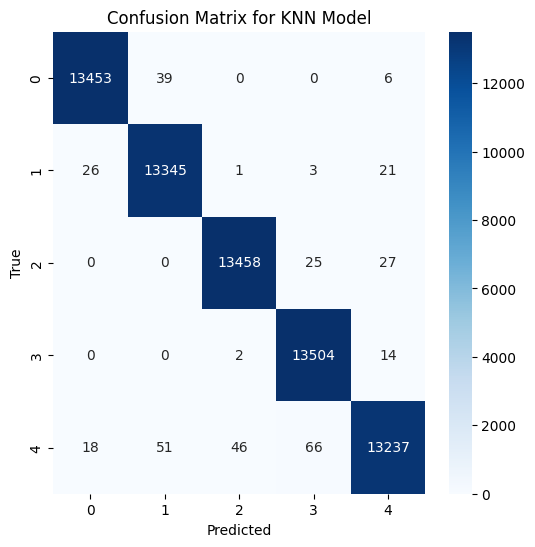

Accuracy: 0.9949
Precision: 0.9949
Recall: 0.9949
F1 Score: 0.9949


In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [ ]:
dt_pred = dt.predict(X_test)
dt_pred

array([0, 3, 0, ..., 1, 4, 2])

In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
dt_acc

0.9991090255709661

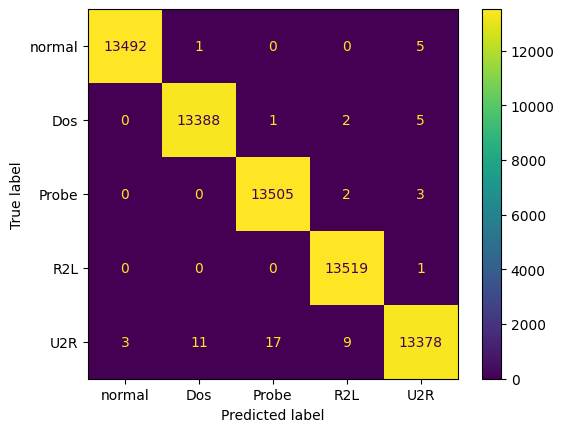

In [ ]:
dt_cm = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(dt_cm,display_labels=target_names).plot()

In [ ]:
print(classification_report(y_test, dt_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13498
         Dos       1.00      1.00      1.00     13396
       Probe       1.00      1.00      1.00     13510
         R2L       1.00      1.00      1.00     13520
         U2R       1.00      1.00      1.00     13418

    accuracy                           1.00     67342
   macro avg       1.00      1.00      1.00     67342
weighted avg       1.00      1.00      1.00     67342



## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [ ]:
rf_pred = rf.predict(X_test)
rf_pred

array([0, 3, 0, ..., 1, 4, 2])

In [ ]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

0.9997030085236553

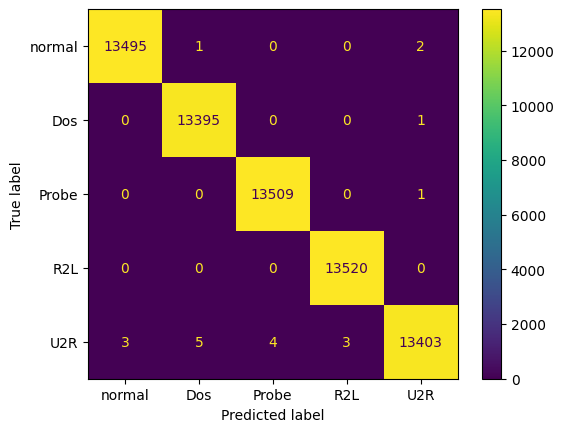

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(rf_cm,display_labels=target_names).plot()

In [ ]:
print(classification_report(y_test, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13498
         Dos       1.00      1.00      1.00     13396
       Probe       1.00      1.00      1.00     13510
         R2L       1.00      1.00      1.00     13520
         U2R       1.00      1.00      1.00     13418

    accuracy                           1.00     67342
   macro avg       1.00      1.00      1.00     67342
weighted avg       1.00      1.00      1.00     67342



## SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


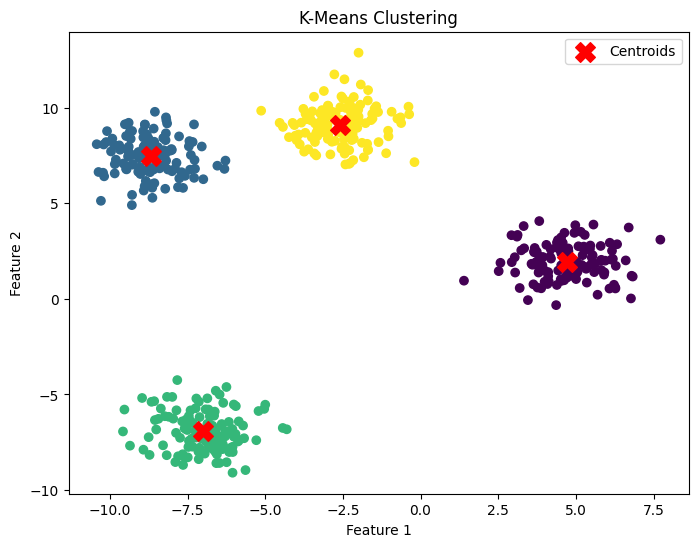

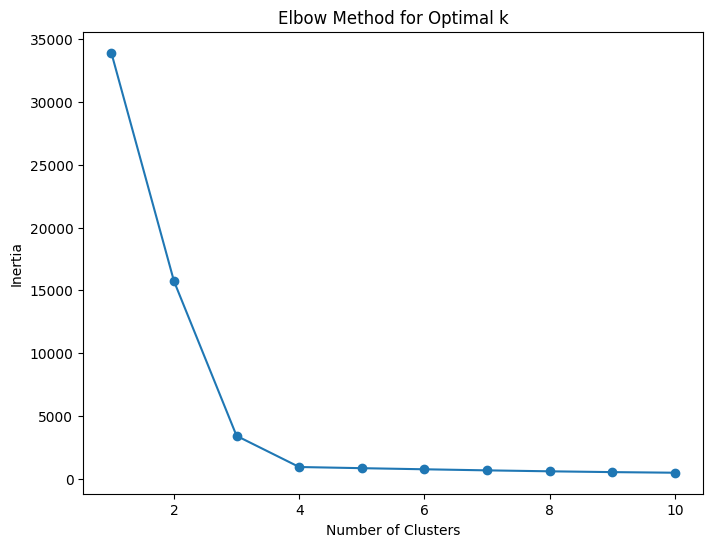

Silhouette Score: 0.36


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
X, y = make_blobs(n_samples=500, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


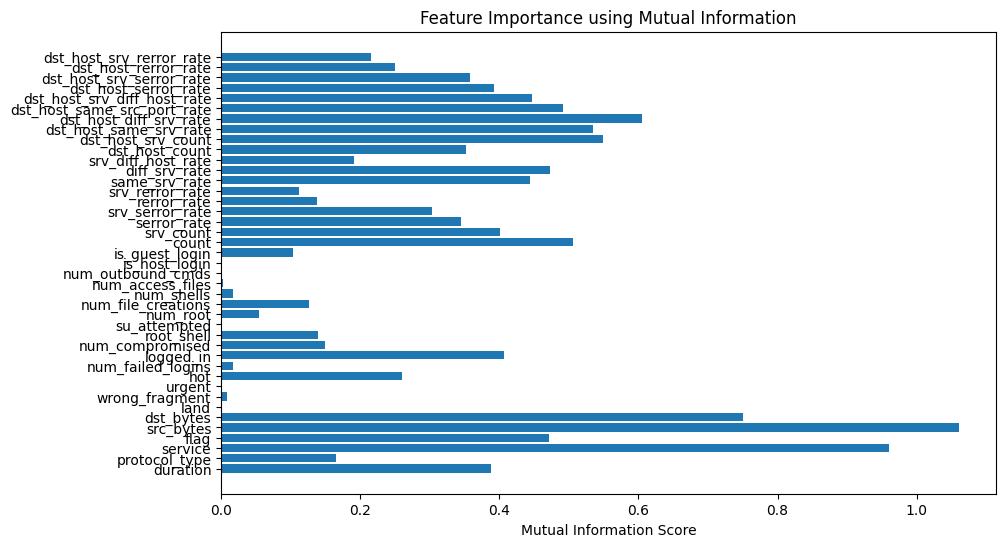

Selected Top 10 Features:
Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train, y_train)
scores = selector.scores_
plt.figure(figsize=(10, 6))
plt.barh(range(len(scores)), scores, align='center')
plt.yticks(range(len(scores)), X_train.columns)
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')
plt.show()
selected_columns = X_train.columns[selector.get_support()]
print("Selected Top 10 Features:")
print(selected_columns)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


Model saved as decision_tree_model.joblib
Decision Tree Evaluation:
Accuracy: 0.9988
Precision: 0.9988
Recall: 0.9988
F1 Score: 0.9988
ROC AUC: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13498
           1       1.00      1.00      1.00     13396
           2       1.00      1.00      1.00     13510
           3       1.00      1.00      1.00     13520
           4       1.00      1.00      1.00     13418

    accuracy                           1.00     67342
   macro avg       1.00      1.00      1.00     67342
weighted avg       1.00      1.00      1.00     67342



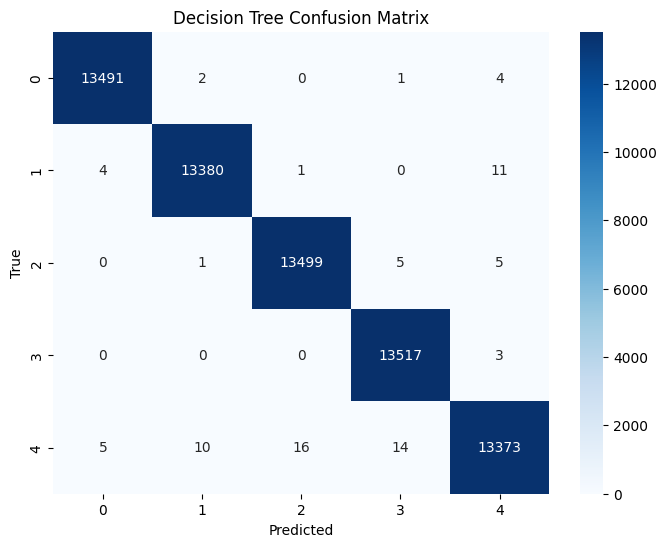

Model saved as random_forest_model.joblib
Random Forest Evaluation:
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13498
           1       1.00      1.00      1.00     13396
           2       1.00      1.00      1.00     13510
           3       1.00      1.00      1.00     13520
           4       1.00      1.00      1.00     13418

    accuracy                           1.00     67342
   macro avg       1.00      1.00      1.00     67342
weighted avg       1.00      1.00      1.00     67342



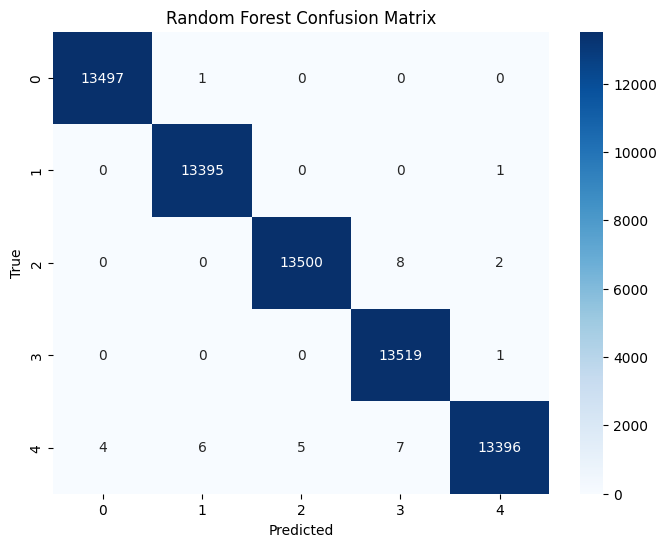

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]
for model_name, model in models:
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_selected), multi_class='ovr', average='weighted')
    except:
        roc_auc = None
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print("="*50)

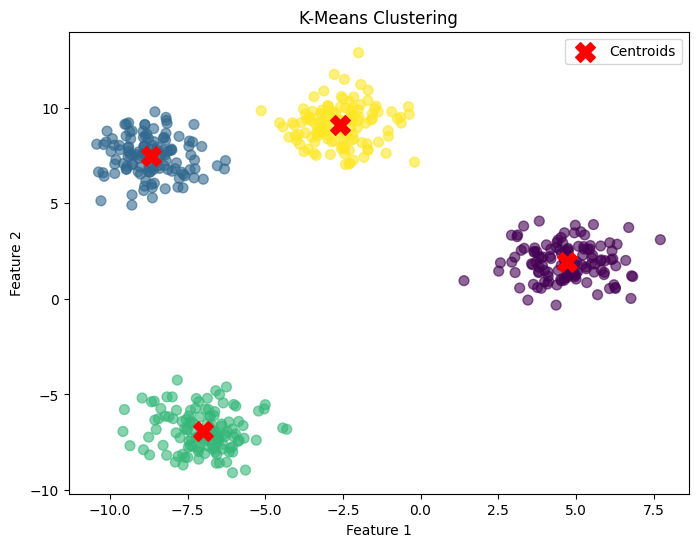

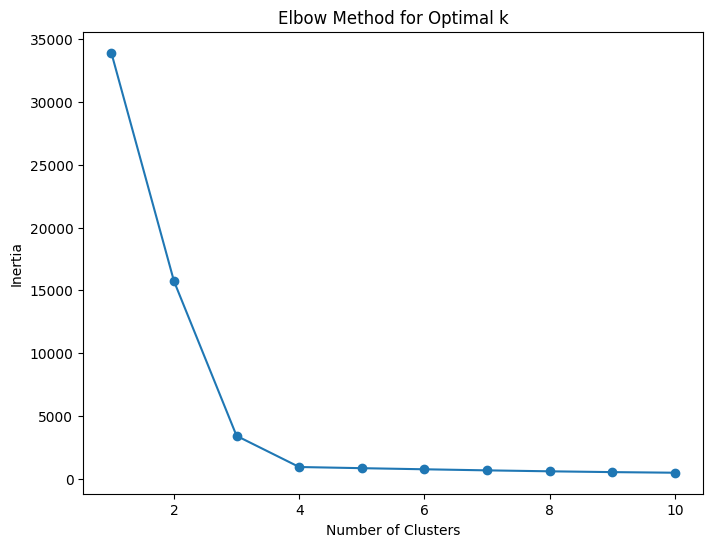

Silhouette Score for k=4: 0.79


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
X, y = make_blobs(n_samples=500, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for k={best_k}: {sil_score:.2f}")


## Compare Accuracy

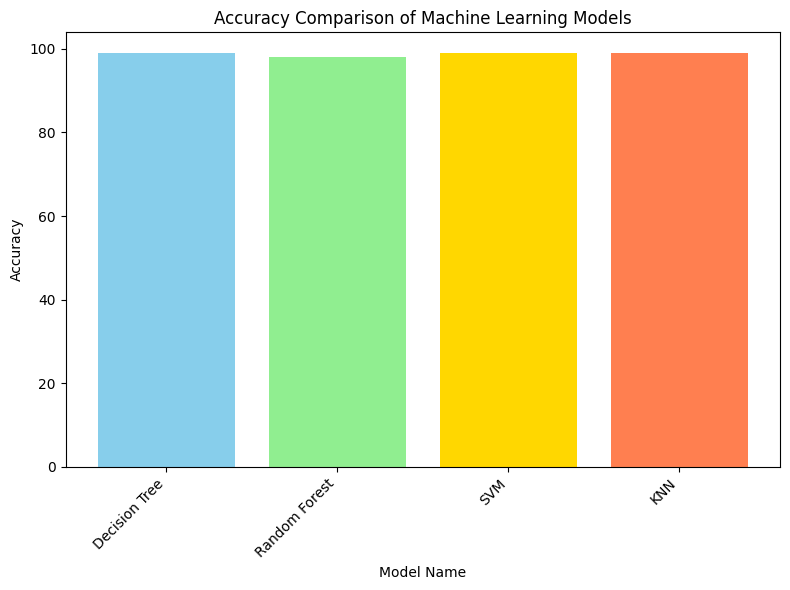

In [ ]:
models = ['Decision Tree', 'Random Forest',"SVM","KNN"]
accuracies = [99, 98,99,99]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'gold', 'coral', 'violet'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.xticks(rotation=45, ha='right')


# Display the bar chart
plt.tight_layout()
plt.show()